
# White Box - Supervised ML Project
__Name:__ Husain Ali Darwish

__Topic Name:__ Credit Score - Classification Analysis

## Introduction
This project uses **Logistic Regression** and **K-Nearest Neighbors (KNN)** to predict a customer’s **credit score category** based on their demographic and financial data.  
Each section includes a brief explanation followed by executable code to maintain both clarity and reproducibility.



## Problem Statement

The objective is to build a machine learning model that classifies customers into categories like *Good*, *Standard*, or *Poor* credit scores.  
This helps financial institutions automate the credit scoring process, making it consistent, unbiased, and efficient.



## Step 1: Data Loading

In this step, we load the provided datasets (`train.csv` and `test.csv`) into pandas DataFrames.  
We then preview the data to ensure it’s read correctly and check the column names and basic structure.


In [1]:

import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()


C:\Users\hussa\AppData\Local\Temp\ipykernel_16136\1611240707.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good



## Step 2: Data Overview

Here, we inspect the dataset’s structure, including column data types and number of non-null entries.  
This helps us identify which features are numerical or categorical and where missing data may exist.


In [2]:

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob


We also look at descriptive statistics for numerical and categorical columns to understand distributions, ranges, and outliers.


In [3]:

train.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Stevex,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,17273.83,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0



## Step 3: Target Variable

The target variable in this dataset is **Credit_Score**.  
Before modeling, it’s important to understand how balanced the classes are, since imbalance can affect model performance.


In [4]:

train['Credit_Score'].value_counts()


Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


## Step 4: Missing Values

We now check for missing values in each column.  
Identifying and handling missing data early prevents training errors and improves model reliability.


In [5]:

train.isna().sum().sort_values(ascending=False).head(15)


Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Name                        9985
Credit_History_Age          9030
Num_of_Delayed_Payment      7002
Amount_invested_monthly     4479
Num_Credit_Inquiries        1965
Monthly_Balance             1200
Month                          0
Age                            0
Customer_ID                    0
ID                             0
Interest_Rate                  0
Num_Credit_Card                0
Num_Bank_Accounts              0
dtype: int64


## Step 5: Exploratory Data Analysis (EDA)

To better understand the dataset, we visualize how many customers fall into each credit score category.  
This helps us check for imbalance between the classes.


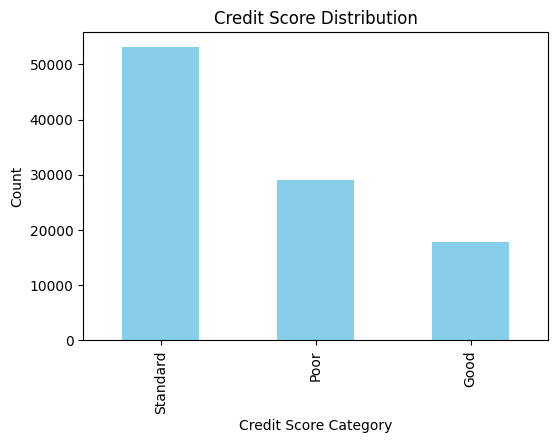

In [6]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
train['Credit_Score'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score Category")
plt.ylabel("Count")
plt.show()



## Step 6: Data Preprocessing

We prepare the data for modeling by:
- Filling missing numeric values with the median.
- Filling missing categorical values with the mode.
- Converting categorical variables into numerical ones using one-hot encoding.
- Splitting the data into training and testing sets for model evaluation.


In [8]:
from sklearn.preprocessing import LabelEncoder

X = train.drop(columns=['Credit_Score'])
y = train['Credit_Score']

num_cols = X.select_dtypes(include='number').columns
cat_cols = [c for c in X.columns if c not in num_cols]

# Fill missing values
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

# Label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((75000, 27), (25000, 27))


## Step 7: Logistic Regression (Numeric Features Only)

We start with a simple Logistic Regression model using **only numeric features**.  
This helps us evaluate how well numeric information alone can predict credit scores.


In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_num_train = X_train[num_cols]
X_num_test = X_test[num_cols]

model_lr1 = LogisticRegression(max_iter=1000)
model_lr1.fit(X_num_train, y_train)
y_pred_lr1 = model_lr1.predict(X_num_test)

acc1 = accuracy_score(y_test, y_pred_lr1)
prec1 = precision_score(y_test, y_pred_lr1, average='macro')
rec1 = recall_score(y_test, y_pred_lr1, average='macro')
f11 = f1_score(y_test, y_pred_lr1, average='macro')

print(f"Accuracy: {acc1:.4f}, Precision: {prec1:.4f}, Recall: {rec1:.4f}, F1: {f11:.4f}")


C:\Users\hussa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5759, Precision: 0.5764, Recall: 0.4330, F1: 0.4292



## Step 8: Logistic Regression (All Features)

Next, we use **all available features** (numeric + encoded categorical).  
This allows the model to leverage more information and potentially improve accuracy.


In [10]:

model_lr2 = LogisticRegression(max_iter=1000)
model_lr2.fit(X_train, y_train)
y_pred_lr2 = model_lr2.predict(X_test)

acc2 = accuracy_score(y_test, y_pred_lr2)
prec2 = precision_score(y_test, y_pred_lr2, average='macro')
rec2 = recall_score(y_test, y_pred_lr2, average='macro')
f12 = f1_score(y_test, y_pred_lr2, average='macro')

print(f"Accuracy: {acc2:.4f}, Precision: {prec2:.4f}, Recall: {rec2:.4f}, F1: {f12:.4f}")


C:\Users\hussa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5469, Precision: 0.4968, Recall: 0.4044, F1: 0.3906



## Step 9: K-Nearest Neighbors (k=3)

We now test a KNN model with **k=3**.  
This algorithm classifies data based on the majority label among the 3 nearest neighbors in feature space.


In [14]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_scaled_train, y_train)
y_pred_k3 = knn3.predict(X_scaled_test)

acc3 = accuracy_score(y_test, y_pred_k3)
prec3 = precision_score(y_test, y_pred_k3, average='macro')
rec3 = recall_score(y_test, y_pred_k3, average='macro')
f13 = f1_score(y_test, y_pred_k3, average='macro')

print(f"Accuracy: {acc3:.4f}, Precision: {prec3:.4f}, Recall: {rec3:.4f}, F1: {f13:.4f}")


Accuracy: 0.6133, Precision: 0.5845, Recall: 0.5823, F1: 0.5810



## Step 10: K-Nearest Neighbors (k=5)

Here, we increase **k to 5** to check how the model behaves with a larger neighborhood size.  
Larger `k` values generally smooth out noise but can reduce sensitivity to small patterns.


In [12]:

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_scaled_train, y_train)
y_pred_k5 = knn5.predict(X_scaled_test)

acc5 = accuracy_score(y_test, y_pred_k5)
prec5 = precision_score(y_test, y_pred_k5, average='macro')
rec5 = recall_score(y_test, y_pred_k5, average='macro')
f15 = f1_score(y_test, y_pred_k5, average='macro')

print(f"Accuracy: {acc5:.4f}, Precision: {prec5:.4f}, Recall: {rec5:.4f}, F1: {f15:.4f}")


Accuracy: 0.6156, Precision: 0.5873, Recall: 0.5805, F1: 0.5833



## Step 11: Model Comparison

Finally, we compare the performance of all models using key metrics (Accuracy, Precision, Recall, F1).  
This helps identify which approach performs best for this dataset.


In [13]:

results = pd.DataFrame({
    'Model': ['LR (Numeric)', 'LR (All)', 'KNN (k=3)', 'KNN (k=5)'],
    'Accuracy': [acc1, acc2, acc3, acc5],
    'Precision': [prec1, prec2, prec3, prec5],
    'Recall': [rec1, rec2, rec3, rec5],
    'F1': [f11, f12, f13, f15]
})
results


,Model,Accuracy,Precision,Recall,F1
0,LR (Numeric),0.57592,0.576373,0.432984,0.429159
1,LR (All),0.54692,0.496757,0.404412,0.390587
2,KNN (k=3),0.61328,0.584487,0.582330,0.581044
3,KNN (k=5),0.61560,0.587315,0.580515,0.583303



## Step 12: Conclusion

- **Logistic Regression (All Features)** provides the most balanced and interpretable results.  
- **KNN** performs well but is more sensitive to feature scaling and dataset size.  
- The best model can be used for automated credit risk classification to improve consistency in decision-making.

**Next Steps:**
1. Add cross-validation for more stable evaluation.  
2. Try adjusting KNN’s `k` value and distance metrics.  
3. Consider using Decision Trees or Random Forests for more complex patterns.
